# Data Analysis: 2024 NTCA Legacy T20 - Champions Division
## Batting, Bowling and Fielding Dataset
### 1. Batting Dataset Analysis

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
# Reading the Dataset:
batting_df = pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Batting", header=0)
batting_df.head()


,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Ins ↓,No ↓,Runs ↓,Balls ↓,Avg ↓,Sr ↓,Hs ↓,100's ↓,75's ↓,50's ↓,25's ↓,0 ↓,6's ↓,4's ↓
0,1,Dev Jivnani,D,DCCC 1,6,6,1,296,158,59.2,187.34,91,0,2,2,2,0,14,24
1,2,Sujith Gowda,C,Frisco Gryffyns,5,4,2,271,147,135.5,184.35,115,1,0,2,1,0,21,14
2,3,Muhammad Waqas Saleem,B,DFW Kingsmen 2,5,5,0,240,176,48,136.36,61,0,0,3,1,0,9,20
3,4,Aneesh Reddy Musugu,D,DCCC 1,6,6,2,235,168,58.75,139.88,60,0,0,3,1,0,8,18
4,5,Ali Shah,D,GPCC Gladiators,6,6,2,210,148,52.5,141.89,108,1,0,0,2,1,4,21


In [358]:
# Checking the column names:
batting_df.columns

Index(['# ↓', 'Player  ↓', 'Group  ↓', 'Team  ↓', 'Mat  ↓', 'Ins  ↓', 'No  ↓',
       'Runs  ↓', 'Balls  ↓', 'Avg  ↓', 'Sr  ↓', 'Hs  ↓', '100's  ↓',
       '75's  ↓', '50's  ↓', '25's  ↓', '0  ↓', '6's  ↓', '4's  ↓'],
      dtype='object')

In [359]:
# Removing ↓ symbol from the column names
batting_df.columns=batting_df.columns.str.replace("↓","")
batting_df.columns=batting_df.columns.str.strip()
batting_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Ins', 'No', 'Runs', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's'],
      dtype='object')

In [360]:
# Setting column 1 as an index
batting_df.set_index(batting_df.columns[0], inplace=True)
batting_df.head(1)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
#,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,6,6,1,296,158,59.2,187.34,91,0,2,2,2,0,14,24


In [361]:
# Checking the missing values and data types
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 1 to 690
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  690 non-null    object 
 1   Group   690 non-null    object 
 2   Team    690 non-null    object 
 3   Mat     690 non-null    int64  
 4   Ins     690 non-null    int64  
 5   No      690 non-null    int64  
 6   Runs    690 non-null    int64  
 7   Balls   690 non-null    int64  
 8   Avg     690 non-null    object 
 9   Sr      690 non-null    float64
 10  Hs      690 non-null    int64  
 11  100's   690 non-null    int64  
 12  75's    690 non-null    int64  
 13  50's    690 non-null    int64  
 14  25's    690 non-null    int64  
 15  0       690 non-null    int64  
 16  6's     690 non-null    int64  
 17  4's     690 non-null    int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 102.4+ KB


In [362]:
# Checking data type of Avg Column
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 690 entries, 1 to 690
Series name: Avg
Non-Null Count  Dtype 
--------------  ----- 
690 non-null    object
dtypes: object(1)
memory usage: 10.8+ KB


In [363]:
# Converting data type of Avg column from Object to float
batting_df['Avg'] = pd.to_numeric(batting_df['Avg'], errors='coerce')

In [364]:
# Checking the null values in each column
print("\nMissing Values in Batting Dataset:")
batting_df.isnull().sum()
# no null values available in the dataset


Missing Values in Batting Dataset:


Player      0
Group       0
Team        0
Mat         0
Ins         0
No          0
Runs        0
Balls       0
Avg       196
Sr          0
Hs          0
100's       0
75's        0
50's        0
25's        0
0           0
6's         0
4's         0
dtype: int64

In [365]:
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 690 entries, 1 to 690
Series name: Avg
Non-Null Count  Dtype  
--------------  -----  
494 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [366]:
# Filling null values 
batting_df["Avg"]=batting_df["Avg"].fillna(batting_df["Avg"].mean())
batting_df["Avg"]

#
1       59.2000
2      135.5000
3       48.0000
4       58.7500
5       52.5000
         ...   
686      0.0000
687      0.0000
688     17.8483
689      0.0000
690      0.0000
Name: Avg, Length: 690, dtype: float64

In [367]:
# Descriptive Analytics:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,2.562319,1.927536,0.402899,31.653623,25.284058,17.848300,86.482870,18.931884,0.011594,0.021739,0.131884,0.288406,0.176812,1.197101,2.539130
std,1.638533,1.625440,0.639750,45.711759,31.265619,14.990683,62.603838,22.879371,0.107128,0.155564,0.429329,0.567130,0.424963,2.454578,4.448943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,8.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,13.000000,13.500000,17.848300,94.830000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,1.000000,43.000000,36.000000,19.187500,133.330000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,6.000000,6.000000,3.000000,296.000000,176.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,21.000000,25.000000


In [368]:
# Checking Unique Team names
batting_df['Team'].unique()

array(['\xa0DCCC 1', '\xa0Frisco Gryffyns', '\xa0DFW Kingsmen 2',
       '\xa0GPCC Gladiators', '\xa0Elite Lions',
       '\xa0Lanka Colts Cowboys', '\xa0NDCC Royals', '\xa0Pcc Reds',
       '\xa0McKinney Lazy Cricketers', '\xa0Spartans T20',
       '\xa0Soaring Eagles', '\xa0Pcc Googlies', '\xa0FCG Maharajas',
       '\xa0Hawks', '\xa0Somerset Stars', '\xa0FCG Badshahz',
       '\xa0Frisco Cobras', '\xa0Eagles-Tigers', '\xa0Elite Pumas',
       '\xa0Metroplex', '\xa0MNCC SunRisers', '\xa0Galacticos T20',
       '\xa0DCCC 2', '\xa0PCA I', '\xa0Pcc Cubs', '\xa0Irving Blues',
       '\xa0DFW Kingsmen', '\xa0Irving Whites'], dtype=object)

In [369]:
# Replacing \xao from the dataset values
batting_df = batting_df.replace(u'\xa0', u'', regex=True)

In [370]:
batting_df['Team'] = batting_df['Team'].str.replace('\xa0', '')
batting_df['Team']=batting_df['Team'].str.strip()
batting_df['Team'].unique()

array(['DCCC 1', 'Frisco Gryffyns', 'DFW Kingsmen 2', 'GPCC Gladiators',
       'Elite Lions', 'Lanka Colts Cowboys', 'NDCC Royals', 'Pcc Reds',
       'McKinney Lazy Cricketers', 'Spartans T20', 'Soaring Eagles',
       'Pcc Googlies', 'FCG Maharajas', 'Hawks', 'Somerset Stars',
       'FCG Badshahz', 'Frisco Cobras', 'Eagles-Tigers', 'Elite Pumas',
       'Metroplex', 'MNCC SunRisers', 'Galacticos T20', 'DCCC 2', 'PCA I',
       'Pcc Cubs', 'Irving Blues', 'DFW Kingsmen', 'Irving Whites'],
      dtype=object)

In [371]:
# Checking the  number of players from each team participating in Champoionship division
batting_df['Team'].value_counts().head(5)

Team
DCCC 2            32
FCG Badshahz      31
Galacticos T20    31
Pcc Cubs          30
Pcc Reds          30
Name: count, dtype: int64

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


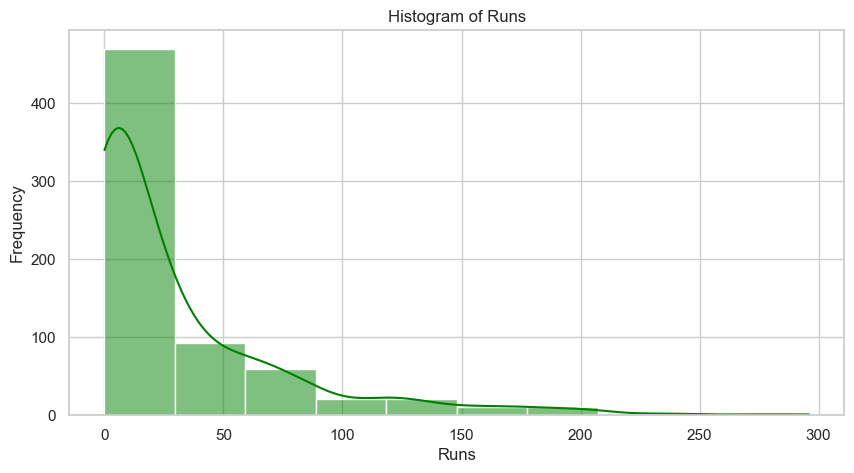

In [372]:
# Data Visualization:

# 1. Histogram of Runs
plt.figure(figsize=(10, 5))
sns.histplot(batting_df['Runs'], bins=10, kde=True, color='green')
plt.title('Histogram of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# The histogram showes the data is skewed to the right which shows
# mean is greater then the median.
# It indicates that most of the data points are clusted on the left side 
# with a few extreme values pulling the average (mean) higher 
# than the median; essentially, the majority of data is smaller
#  than the average value, with a few significantly larger outliers on the right side.


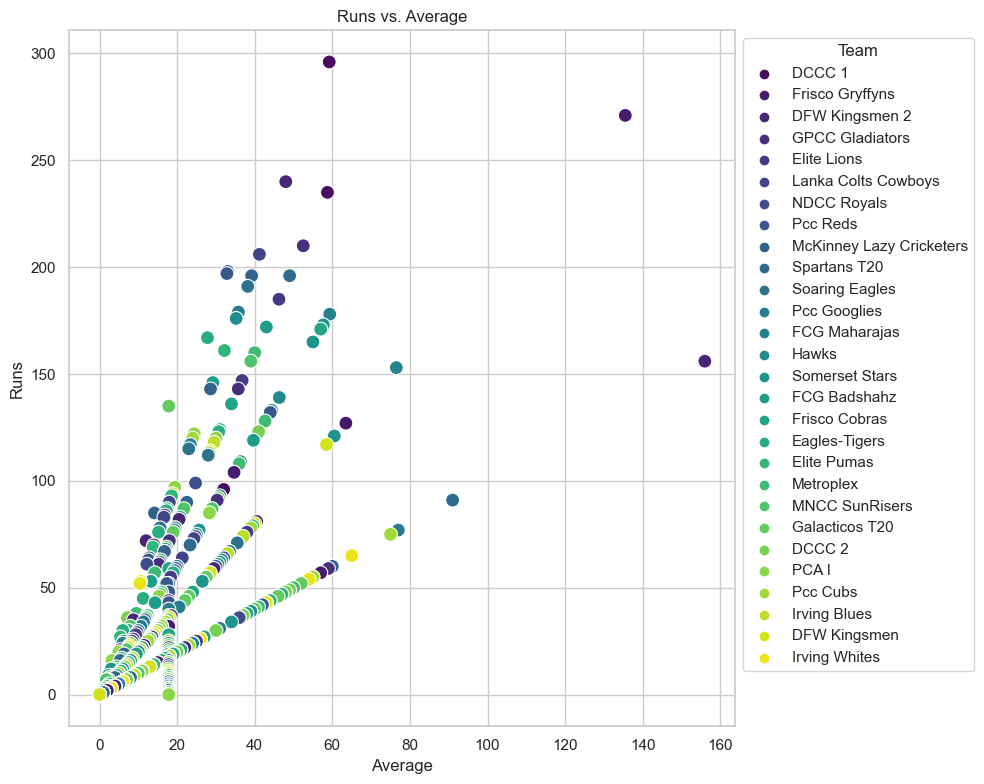

In [373]:
# Scatter Plot: Runs vs. Average in batting data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Avg', y='Runs', data=batting_df, hue='Team', s=100, palette='viridis')
plt.title('Runs vs. Average')
plt.xlabel('Average')
plt.ylabel('Runs')
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [374]:
# Maxinmum matches played in the tournament
batting_df['Mat'].max() 


6

In [375]:
# Created a dataframe df of players who played min 4 matches and min 4 innings 
# sorted by the runs scored
df= batting_df[(batting_df['Mat']>=5) & (batting_df['Ins']>=5)][['Player','Team','Mat','Ins','Runs','Balls','Avg']].sort_values("Runs", ascending=False).head(20)
df

,Player,Team,Mat,Ins,Runs,Balls,Avg
#,,,,,,,
1,Dev Jivnani,DCCC 1,6,6,296,158,59.20
3,Muhammad Waqas Saleem,DFW Kingsmen 2,5,5,240,176,48.00
4,Aneesh Reddy Musugu,DCCC 1,6,6,235,168,58.75
5,Ali Shah,GPCC Gladiators,6,6,210,148,52.50
6,Sohan Reddy Angannagari,Elite Lions,6,6,206,109,41.20
7,Jayachandra Reddy Yeddula,Lanka Colts Cowboys,5,5,206,125,41.20
8,Thouhidul Islam,NDCC Royals,6,6,198,116,33.00
9,Srikanth Gutlapalli,Pcc Reds,6,6,197,149,32.83
11,RAJENDRAN KUMAR,Spartans T20,5,5,196,168,49.00


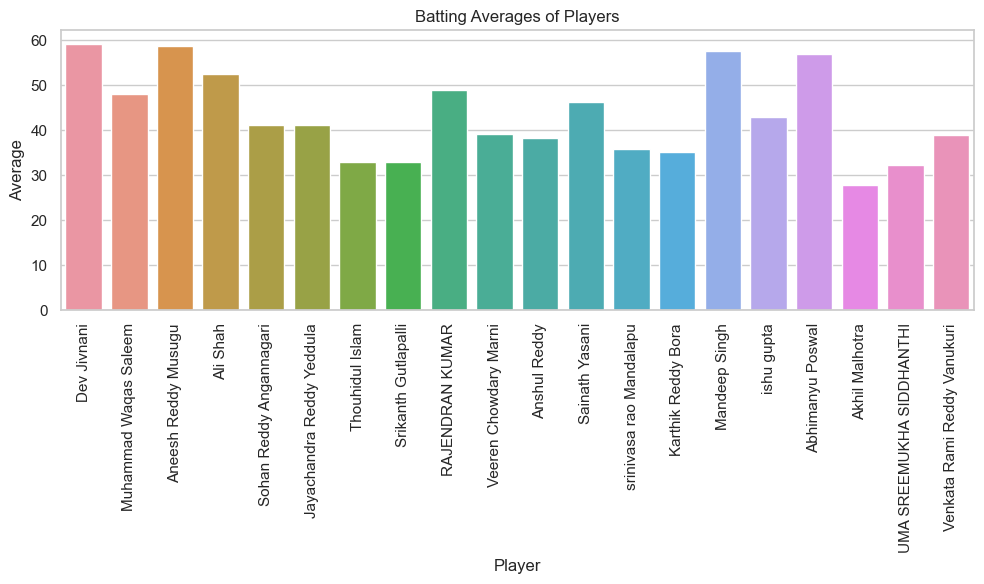

In [376]:
# Visualizing Batting Average of players who played min 4 matches and min 4 innings sorted by runs 
plt.figure(figsize=(10,6))
sns.barplot(x="Player",y="Avg", data=df)
plt.title('Batting Averages of Players')
plt.ylabel('Average')
plt.xlabel('Player')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [377]:
# Feature Engineering
# Calculating boundary percentage:
batting_df["Boundary%"]=((batting_df['6\'s'] * 6) + (batting_df['4\'s'] * 4)) / batting_df['Runs'] * 100
batting_df.head(2)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
#,,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,6,6,1,296,158,59.2,187.34,91,0,2,2,2,0,14,24,60.810811
2,Sujith Gowda,C,Frisco Gryffyns,5,4,2,271,147,135.5,184.35,115,1,0,2,1,0,21,14,67.158672


In [378]:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,534.000000
mean,2.562319,1.927536,0.402899,31.653623,25.284058,17.848300,86.482870,18.931884,0.011594,0.021739,0.131884,0.288406,0.176812,1.197101,2.539130,38.832492
std,1.638533,1.625440,0.639750,45.711759,31.265619,14.990683,62.603838,22.879371,0.107128,0.155564,0.429329,0.567130,0.424963,2.454578,4.448943,27.942862
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,8.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,13.000000,13.500000,17.848300,94.830000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.444444
75%,4.000000,3.000000,1.000000,43.000000,36.000000,19.187500,133.330000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,60.000000
max,6.000000,6.000000,3.000000,296.000000,176.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,21.000000,25.000000,100.000000


## Bowling Data Analysis

In [379]:
bowling_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Bowling", header=0)
bowling_df.head(1)

,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Inns ↓,Overs ↓,Runs ↓,Wkts ↓,BBf ↓,Mdns ↓,Dots ↓,Econ ↓,Ave ↓,SR ↓,Hat-trick ↓,4W ↓,5W ↓,Wides ↓,Nb ↓
0,1,Atiar Hossen,B,DFW Kingsmen 2,3,3,11.0,63,12,15/ 5,1,38,5.73,5.25,5.5,0,1,1,1,0


In [380]:
# Replacing ↓ from the column names
bowling_df.columns=bowling_df.columns.str.replace("↓","")
bowling_df.columns=bowling_df.columns.str.strip()
bowling_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Inns', 'Overs', 'Runs', 'Wkts',
       'BBf', 'Mdns', 'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb'],
      dtype='object')

In [381]:
# Setting column 0 as an index
bowling_df.set_index(bowling_df.columns[0], inplace=True)
bowling_df.head(1)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
#,,,,,,,,,,,,,,,,,,,
1,Atiar Hossen,B,DFW Kingsmen 2,3,3,11.0,63,12,15/ 5,1,38,5.73,5.25,5.5,0,1,1,1,0


In [382]:
# Removing \xa0 from the dataset values
bowling_df = bowling_df.replace(u'\xa0', u'', regex=True)
bowling_df["Mat"].unique()

array([3, 5, 6, 4, 2, 1], dtype=int64)

In [383]:
# Checking  the data type of each column
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 1 to 449
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     449 non-null    object 
 1   Group      449 non-null    object 
 2   Team       449 non-null    object 
 3   Mat        449 non-null    int64  
 4   Inns       449 non-null    int64  
 5   Overs      449 non-null    float64
 6   Runs       449 non-null    int64  
 7   Wkts       449 non-null    int64  
 8   BBf        449 non-null    object 
 9   Mdns       449 non-null    int64  
 10  Dots       449 non-null    int64  
 11  Econ       449 non-null    float64
 12  Ave        449 non-null    float64
 13  SR         449 non-null    float64
 14  Hat-trick  449 non-null    int64  
 15  4W         449 non-null    int64  
 16  5W         449 non-null    int64  
 17  Wides      449 non-null    int64  
 18  Nb         449 non-null    int64  
dtypes: float64(4), int64(11), object(4)
memory usage: 70.2+

In [384]:
# Checking number of null values in each column
bowling_df.isna().sum()

Player       0
Group        0
Team         0
Mat          0
Inns         0
Overs        0
Runs         0
Wkts         0
BBf          0
Mdns         0
Dots         0
Econ         0
Ave          0
SR           0
Hat-trick    0
4W           0
5W           0
Wides        0
Nb           0
dtype: int64

In [385]:
# Checking rows and columns of bowling dataset
bowling_df.shape

(449, 19)

In [386]:
bowling_df['Mat'].max() #Max number of matches played

6

In [387]:
# Creating a dataframe of players who played minimum 5 matches and minimum 4 innings sort by wickets 
# Dataframe b1 include Player name, Overs, Runs, Econ and wikets
b1=bowling_df[(bowling_df["Mat"]>=5) & (bowling_df['Inns']>=4)][["Player","Overs","Runs","Wkts","Econ"]].sort_values("Wkts",ascending=False)
b1.head(5)

,Player,Overs,Runs,Wkts,Econ
#,,,,,
2,Siddantham Praneeth Raj,19.0,104,11,5.47
4,Omer Wajihuddin Syed,19.4,114,10,5.80
5,Prasad Vaddi,15.0,98,10,6.53
6,Sauman Basu,19.0,157,10,8.26
3,Muhammad Ilyas,16.4,86,10,5.16


In [388]:
b1.sort_values(by=["Wkts","Overs"],ascending=False).head()

,Player,Overs,Runs,Wkts,Econ
#,,,,,
2,Siddantham Praneeth Raj,19.0,104,11,5.47
4,Omer Wajihuddin Syed,19.4,114,10,5.80
6,Sauman Basu,19.0,157,10,8.26
3,Muhammad Ilyas,16.4,86,10,5.16
5,Prasad Vaddi,15.0,98,10,6.53


In [389]:
# Creating a dataframe of players who played minimum 4 innings and have econ less than 6
b2= bowling_df[(bowling_df["Inns"]>=5)&(bowling_df["Econ"]<6)][["Player","Mat","Overs","Runs","Wkts","Econ"]].head(10)
b2

,Player,Mat,Overs,Runs,Wkts,Econ
#,,,,,,
2,Siddantham Praneeth Raj,5,19.0,104,11,5.47
3,Muhammad Ilyas,5,16.4,86,10,5.16
4,Omer Wajihuddin Syed,5,19.4,114,10,5.80
7,Naren Reddy Dharma,5,16.2,82,9,5.02
74,Muhammad Waqas Saleem,5,18.0,92,4,5.11
101,Praveen Borra,5,12.0,60,3,5.00
107,Jagpreet Singh,5,17.0,97,3,5.71


In [390]:
bowling_df.describe()

,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,2.757238,2.302895,6.407795,51.879733,2.106904,0.062361,15.405345,8.746325,18.552294,13.672606,0.004454,0.037862,0.008909,3.048998,0.209354
std,1.669406,1.467510,4.877930,38.306491,2.245466,0.251131,13.453477,3.282836,19.278674,12.992250,0.094386,0.191075,0.094069,3.177390,0.559657
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.510000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,5.000000,40.000000,1.000000,0.000000,11.000000,8.220000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,4.000000,3.000000,9.000000,72.000000,3.000000,0.000000,23.000000,10.330000,27.000000,20.000000,0.000000,0.000000,0.000000,5.000000,0.000000
max,6.000000,6.000000,23.000000,196.000000,12.000000,2.000000,66.000000,24.000000,140.000000,96.000000,2.000000,1.000000,1.000000,18.000000,4.000000


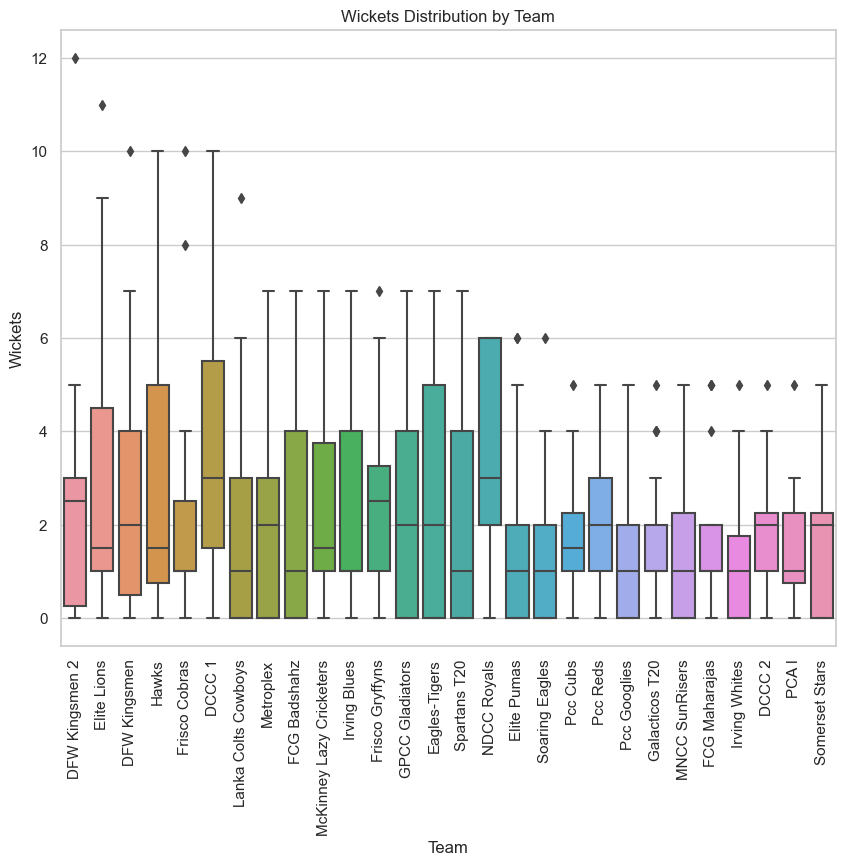

In [391]:
# Box Plot: Wickets Distribution by Team in bowling data
plt.figure(figsize=(10, 8))
sns.boxplot(x='Team', y='Wkts', data=bowling_df)
plt.title('Wickets Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.xticks(rotation=90)
plt.show()

In [392]:
# Bowling: Calculating the efficiency ratio (wickets per run given)
bowling_df['Efficiency'] = bowling_df['Wkts'] / bowling_df['Runs']
bowling_df.head(2)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
#,,,,,,,,,,,,,,,,,,,,
1,Atiar Hossen,B,DFW Kingsmen 2,3,3,11.0,63,12,15/5,1,38,5.73,5.25,5.5,0,1,1,1,0,0.190476
2,Siddantham Praneeth Raj,C,Elite Lions,5,5,19.0,104,11,23/4,0,66,5.47,9.45,10.4,0,1,0,4,1,0.105769


In [393]:
# Summary statistics
bowling_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,2.757238,2.302895,6.407795,51.879733,2.106904,0.062361,15.405345,8.746325,18.552294,13.672606,0.004454,0.037862,0.008909,3.048998,0.209354,inf
std,1.669406,1.467510,4.877930,38.306491,2.245466,0.251131,13.453477,3.282836,19.278674,12.992250,0.094386,0.191075,0.094069,3.177390,0.559657,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.510000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,5.000000,40.000000,1.000000,0.000000,11.000000,8.220000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.032258
75%,4.000000,3.000000,9.000000,72.000000,3.000000,0.000000,23.000000,10.330000,27.000000,20.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.062500
max,6.000000,6.000000,23.000000,196.000000,12.000000,2.000000,66.000000,24.000000,140.000000,96.000000,2.000000,1.000000,1.000000,18.000000,4.000000,inf


## 3. Fielding Data Analysis

In [394]:
fielding_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Fielding", header=0)
fielding_df.head(10)

,# ↓,Player ↓,Group ↓,Team ↓,Catches ↓,WK Catches ↓,Direct RO ↓,Indirect RO ↓,Stumpings ↓,Total ↓
0,1,Saikiran Valaboju,B,Frisco Cobras,9,0,0,0,0,9
1,2,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
2,3,Ali Sheikh,D,DFW Kingsmen,7,0,1,0,0,8
3,4,Thouhidul Islam,D,NDCC Royals,2,5,1,0,0,8
4,5,Sharath Dwaram,A,Hawks,0,4,0,0,3,7
5,6,Kireeti Eluri,A,Pcc Googlies,0,2,0,4,1,7
6,7,Muhammad Waqas Saleem,B,DFW Kingsmen 2,6,0,0,0,0,6
7,8,Srikant Panda,D,NDCC Royals,3,2,0,0,1,6
8,9,RAJENDRAN KUMAR,A,Spartans T20,5,0,0,1,0,6
9,10,Dev Jivnani,B,DCCC 2,4,0,1,1,0,6


In [395]:
fielding_df.columns=fielding_df.columns.str.replace('↓','')
fielding_df.columns=fielding_df.columns.str.strip()
fielding_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [396]:
fielding_df.set_index(fielding_df.columns[0], inplace=True)
fielding_df.head(1)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,9,0,0,0,0,9


In [397]:
fielding_df = fielding_df.replace(u'\xa0', u'', regex=True)
fielding_df["Team"].unique()

array(['Frisco Cobras', 'FCG Badshahz', 'DFW Kingsmen', 'NDCC Royals',
       'Hawks', 'Pcc Googlies', 'DFW Kingsmen 2', 'Spartans T20',
       'DCCC 2', 'Elite Lions', 'DCCC 1', 'Metroplex', 'Elite Pumas',
       'McKinney Lazy Cricketers', 'Irving Whites', 'PCA I',
       'GPCC Gladiators', 'Lanka Colts Cowboys', 'FCG Maharajas',
       'Irving Blues', 'Somerset Stars', 'Eagles-Tigers',
       'Galacticos T20', 'Pcc Reds', 'Pcc Cubs', 'Frisco Gryffyns',
       'Soaring Eagles', 'MNCC SunRisers'], dtype=object)

In [398]:
fielding_df.shape

(690, 9)

In [399]:
fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 1 to 690
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       690 non-null    object
 1   Group        690 non-null    object
 2   Team         690 non-null    object
 3   Catches      690 non-null    int64 
 4   WK Catches   690 non-null    int64 
 5   Direct RO    690 non-null    int64 
 6   Indirect RO  690 non-null    int64 
 7   Stumpings    690 non-null    int64 
 8   Total        690 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 53.9+ KB


In [400]:
fielding_df.isna().sum()

Player         0
Group          0
Team           0
Catches        0
WK Catches     0
Direct RO      0
Indirect RO    0
Stumpings      0
Total          0
dtype: int64

In [401]:
fielding_df.columns

Index(['Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [402]:
# Varifying if Total column is equal to the sum of Catches,WK Catches,Direct RO, Indirect RO and Stumping
fielding_df["Calculated_Total"]=fielding_df["Catches"]+fielding_df["WK Catches"]+fielding_df["Direct RO"]+fielding_df["Indirect RO"]+fielding_df["Stumpings"]
fielding_df.head(3)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,9,0,0,0,0,9,9
2,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9,9
3,Ali Sheikh,D,DFW Kingsmen,7,0,1,0,0,8,8


In [403]:
# Check if there are discrepancies
discrepancies = fielding_df[fielding_df['Total'] != fielding_df['Calculated_Total']]
discrepancies
# both are same so we'll drop the new column

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,


In [404]:
# Removing Calculated_Total column from the dataset
fielding_df=fielding_df.drop("Calculated_Total",axis=1)

In [405]:
# Checking the max number of catches
fielding_df['Catches'].max()

9

In [406]:
# Checking the maximum numbers of wicket keeper catches
fielding_df['WK Catches'].max()

6

In [407]:
# Players with catches more than 2 and total more than 5
fdf= fielding_df[(fielding_df['Catches']>=3) & (fielding_df['Total']>=6)][["Player","Catches","Total"]]
fdf

,Player,Catches,Total
#,,,
1,Saikiran Valaboju,9,9
3,Ali Sheikh,7,8
7,Muhammad Waqas Saleem,6,6
8,Srikant Panda,3,6
9,RAJENDRAN KUMAR,5,6
10,Dev Jivnani,4,6
13,Pujan Patel,3,6
14,Naren Reddy Dharma,3,6


In [408]:
# Sorting values by Total wickets
fielding_df.sort_values(by="Total", ascending=False).head(10)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,9,0,0,0,0,9
2,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
3,Ali Sheikh,D,DFW Kingsmen,7,0,1,0,0,8
4,Thouhidul Islam,D,NDCC Royals,2,5,1,0,0,8
5,Sharath Dwaram,A,Hawks,0,4,0,0,3,7
6,Kireeti Eluri,A,Pcc Googlies,0,2,0,4,1,7
12,Satish Syamala,D,DCCC 1,0,4,0,0,2,6
14,Naren Reddy Dharma,C,Elite Lions,3,0,2,1,0,6
13,Pujan Patel,A,Metroplex,3,0,0,0,3,6


In [409]:
# Summary statistics
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.795652,0.123188,0.101449,0.075362,0.057971,1.153623
std,1.148096,0.578433,0.329706,0.318927,0.331424,1.493924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,9.000000,6.000000,2.000000,4.000000,3.000000,9.000000


c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


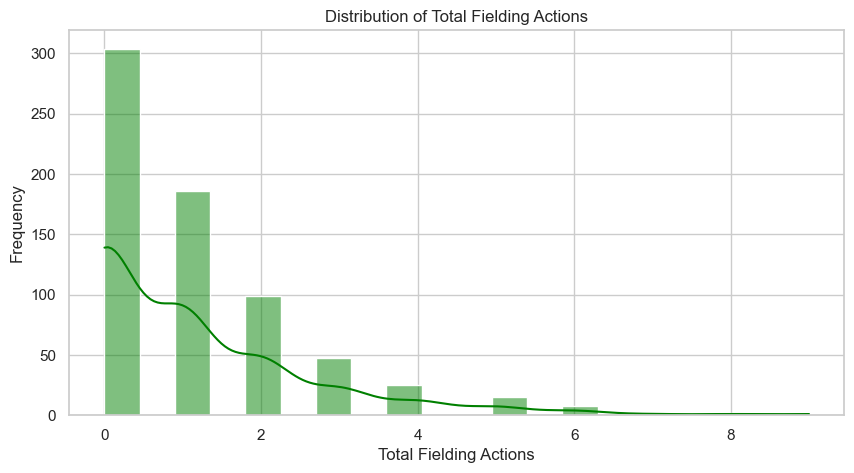

In [410]:
# Histogram of Total fielding actions
plt.figure(figsize=(10, 5))
sns.histplot(fielding_df['Total'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Fielding Actions')
plt.xlabel('Total Fielding Actions')
plt.ylabel('Frequency')
plt.show()

In [411]:
# Checking number of wickets taken by NDCC Royals team
fielding_df[fielding_df["Team"]=='NDCC Royals']['Total'].sum()

38

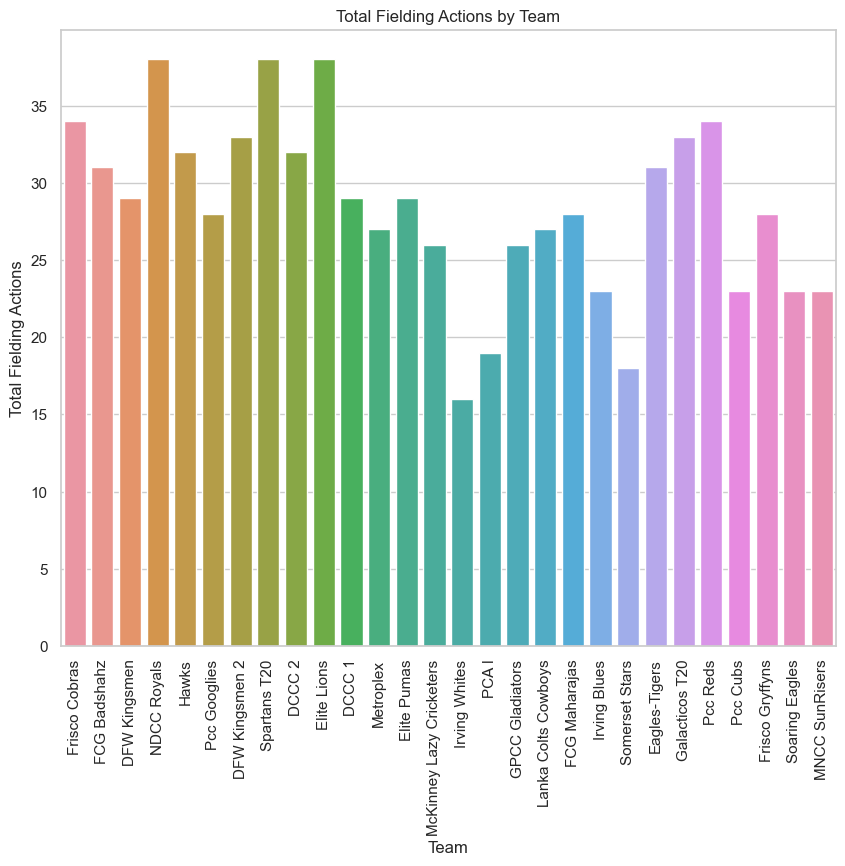

In [412]:
# bar plot of total fielding actions by team: total wickets taken by each team
plt.figure(figsize=(10,8))
sns.barplot(x="Team",y="Total", data=fielding_df, estimator=sum, errorbar=None)
plt.title('Total Fielding Actions by Team')
plt.xlabel('Team')
plt.ylabel('Total Fielding Actions')
plt.xticks(rotation=90)
plt.show()

In [413]:
# Creating new features: 
# Fielding Efficiency and Keeper Contribution

fielding_df['Fielding_Efficiency'] = (fielding_df['Catches'] + fielding_df['Direct RO'] + fielding_df['Indirect RO'] + fielding_df['Stumpings']) / fielding_df['Total']
fielding_df['Keeper Contribution'] = fielding_df['WK Catches'] + fielding_df['Stumpings']
fielding_df.head()

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
#,,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,9,0,0,0,0,9,1.000000,0
2,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9,0.333333,8
3,Ali Sheikh,D,DFW Kingsmen,7,0,1,0,0,8,1.000000,0
4,Thouhidul Islam,D,NDCC Royals,2,5,1,0,0,8,0.375000,5
5,Sharath Dwaram,A,Hawks,0,4,0,0,3,7,0.428571,7


In [414]:
fielding_df["Fielding_Efficiency"].max()

1.0

In [415]:
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,386.000000,690.000000
mean,0.795652,0.123188,0.101449,0.075362,0.057971,1.153623,0.920383,0.181159
std,1.148096,0.578433,0.329706,0.318927,0.331424,1.493924,0.245520,0.792156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,9.000000,6.000000,2.000000,4.000000,3.000000,9.000000,1.000000,8.000000


### Merging Datasets:


In [416]:
cric_df=pd.merge(batting_df, bowling_df, on=["Player","Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Mat_x', 'Ins', 'No', 'Runs_x', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's',
       'Boundary%', 'Mat_y', 'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns',
       'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb',
       'Efficiency'],
      dtype='object')

In [417]:
# Checking if Mat_x and Mat_y are same 
(cric_df["Mat_x"]==cric_df["Mat_y"]).all()

False

In [418]:
# Checking if Runs_x and Runs_y are same 
(cric_df["Runs_x"]==cric_df["Runs_y"]).all()

False

In [419]:
# Combining Mat_x and Mat_y
cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_16556\4222638150.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])


In [420]:
# Checking Max number of match played to 
# varify if the columns are combined properly 
cric_df['Mat'].max()

6

In [421]:
# Dropping Mat_x and Mat_y
cric_df=cric_df.drop(["Mat_x","Mat_y"], axis=1)
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_x', 'Balls', 'Avg', 'Sr',
       'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's', 'Boundary%',
       'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns', 'Dots', 'Econ', 'Ave',
       'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [422]:
# Renaming Runs_x as Runs_Scored, Runs_y as Runs_given, Avg as Batting_Avg and Ave as Bowling_Avg
cric_df.rename(columns={"Runs_x":"Runs_scored","Runs_y":"Runs_given","Avg":"Batting_Avg","Ave":"Bowling_Avg"}, inplace=True)

In [423]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [424]:
# Merging cric_df and fielding_df datasets
cric_df=pd.merge(cric_df,fielding_df, on=['Player',"Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

In [425]:
# Checking number of rows and columns
cric_df.shape

(722, 43)

In [426]:
cric_df.head(2)

,Player,Group,Team,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
0,Aadyanth Masthipuram,B,Pcc Reds,0,0,0,0,17.8483,0.00,0,...,0.000000,1,1,0,0,0,0,1,1.0,0
1,Aakarshit Gomel,C,Elite Lions,1,0,25,19,25.0000,131.58,25,...,0.148936,3,1,0,0,0,0,1,1.0,0


In [427]:
# Checking null values present in the dataset cric_df
cric_df.isnull().sum()

Player                   0
Group                    0
Team                     0
Ins                      0
No                       0
Runs_scored              0
Balls                    0
Batting_Avg              0
Sr                       0
Hs                       0
100's                    0
75's                     0
50's                     0
25's                     0
0                        0
6's                      0
4's                      0
Boundary%              163
Inns                   240
Overs                  240
Runs_given             240
Wkts                   240
BBf                    240
Mdns                   240
Dots                   240
Econ                   240
Bowling_Avg            240
SR                     240
Hat-trick              240
4W                     240
5W                     240
Wides                  240
Nb                     240
Efficiency             240
Mat                      0
Catches                  0
WK Catches               0
D

In [428]:
# Fill the null with 0
cric_df.fillna(0,inplace=True)

In [429]:
cric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               722 non-null    object 
 1   Group                722 non-null    object 
 2   Team                 722 non-null    object 
 3   Ins                  722 non-null    int64  
 4   No                   722 non-null    int64  
 5   Runs_scored          722 non-null    int64  
 6   Balls                722 non-null    int64  
 7   Batting_Avg          722 non-null    float64
 8   Sr                   722 non-null    float64
 9   Hs                   722 non-null    int64  
 10  100's                722 non-null    int64  
 11  75's                 722 non-null    int64  
 12  50's                 722 non-null    int64  
 13  25's                 722 non-null    int64  
 14  0                    722 non-null    int64  
 15  6's                  722 non-null    int

In [430]:
cric_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,100's,75's,50's,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,722.000000,722.000000,722.000000,722.00000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.00000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,1.900277,0.396122,30.846260,24.66482,17.609155,86.080457,18.573407,0.011080,0.020776,0.127424,...,inf,2.533241,0.777008,0.119114,0.101108,0.073407,0.055402,1.126039,0.503834,0.174515
std,1.605651,0.632794,44.958139,30.78206,14.815265,62.498913,22.606586,0.104751,0.152139,0.421800,...,NaN,1.624920,1.135176,0.566954,0.328108,0.314048,0.324206,1.477304,0.492892,0.775859
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.00000,7.752500,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,13.000000,13.00000,17.848300,94.830000,11.000000,0.000000,0.000000,0.000000,...,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.633333,0.000000
75%,3.000000,1.000000,40.000000,35.00000,19.000000,132.360000,26.000000,0.000000,0.000000,0.000000,...,0.04619,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,6.000000,3.000000,296.000000,176.00000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,...,inf,6.000000,9.000000,6.000000,2.000000,4.000000,3.000000,9.000000,1.000000,8.000000


In [431]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

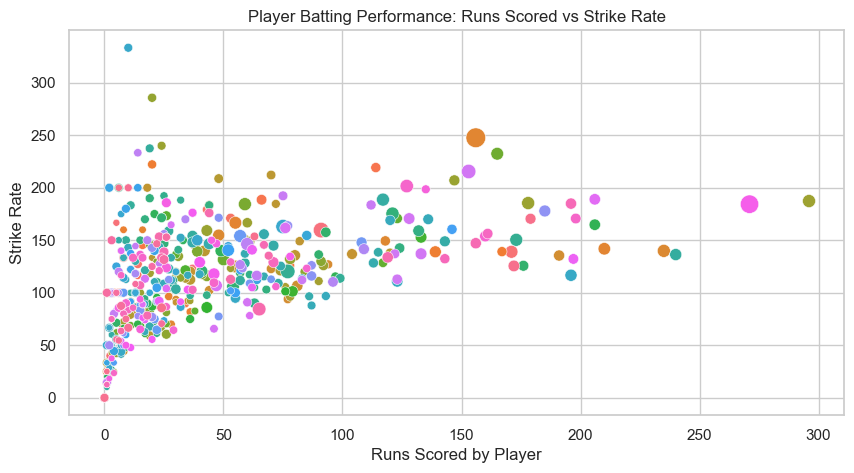

In [432]:
# Visualizing the merged dataset cric_df
# Scatter plot of Economy rate vs strike rate
plt.figure(figsize=(10,5))
sns.scatterplot(data=cric_df, x='Runs_scored',y='Sr', hue='Player',size="Batting_Avg", sizes=(20,200),legend=False)
plt.xlabel("Runs Scored by Player")
plt.ylabel("Strike Rate")
plt.title("Player Batting Performance: Runs Scored vs Strike Rate")
plt.show()

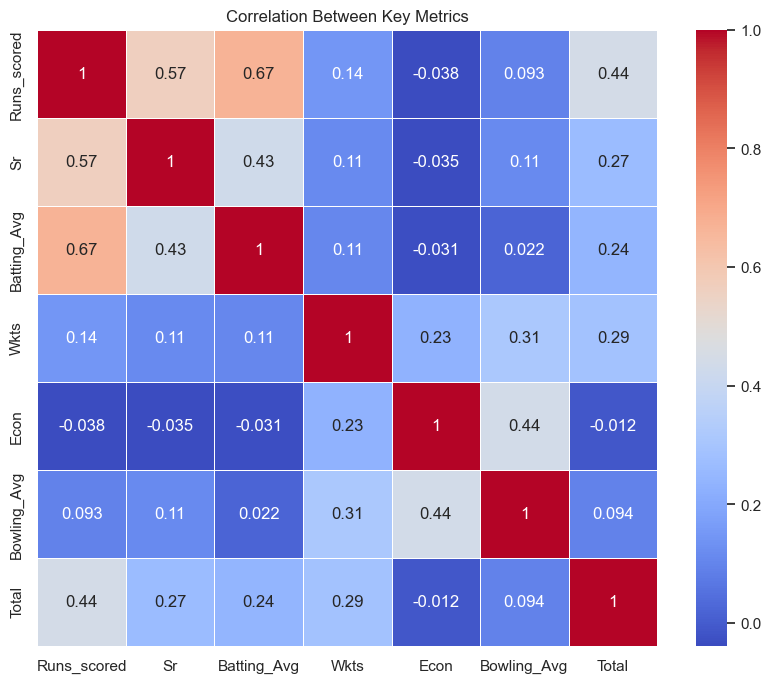

In [433]:
# Correlation matrix for batting, bowling, and fielding metrics
plt.figure(figsize=(10, 8))
corr_matrix = cric_df[['Runs_scored', 'Sr', 'Batting_Avg', 'Wkts', 'Econ', 'Bowling_Avg', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Key Metrics')
plt.show()